# Week 6 Seminar Answers

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd

## Question 1

In [3]:
data = yf.download("AMZN TSLA", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  2 of 2 completed


In [4]:
data.tail()

Adj Close                    Close                     High  \
                   AMZN        TSLA         AMZN        TSLA         AMZN   
Date                                                                        
2021-02-22  3180.739990  714.500000  3180.739990  714.500000  3232.320068   
2021-02-23  3194.500000  698.840027  3194.500000  698.840027  3204.729980   
2021-02-24  3159.530029  742.020020  3159.530029  742.020020  3171.229980   
2021-02-25  3057.159912  682.219971  3057.159912  682.219971  3178.260010   
2021-02-26  3092.929932  675.500000  3092.929932  675.500000  3122.439941   

                                Low                     Open              \
                  TSLA         AMZN        TSLA         AMZN        TSLA   
Date                                                                       
2021-02-22  768.500000  3172.260010  710.200012  3208.129883  762.640015   
2021-02-23  713.609985  3093.600098  619.000000  3127.030029  662.130005   
2021-02-24  745.000000  3125.379883  694.169983  3166.750000  711.849976   
2021-02-25  737.210022  3047.760010  670.580017  3136.739990  726.150024   
2021-02-26  706.700012  3036.699951  659.510010  3095.199951  700.000000   

             Volume            
               AMZN      TSLA  
Date                           
2021-02-22  3515700  37269700  
2021-02-23  4677200  66606900  
2021-02-24  3011300  36767000  
2021-02-25  4533800  39023900  
2021-02-26  4273500  41011300

## Question 2

In [5]:
ADJ =  data['Adj Close']
ADJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-03-02 to 2021-02-26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    251 non-null    float64
 1   TSLA    251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

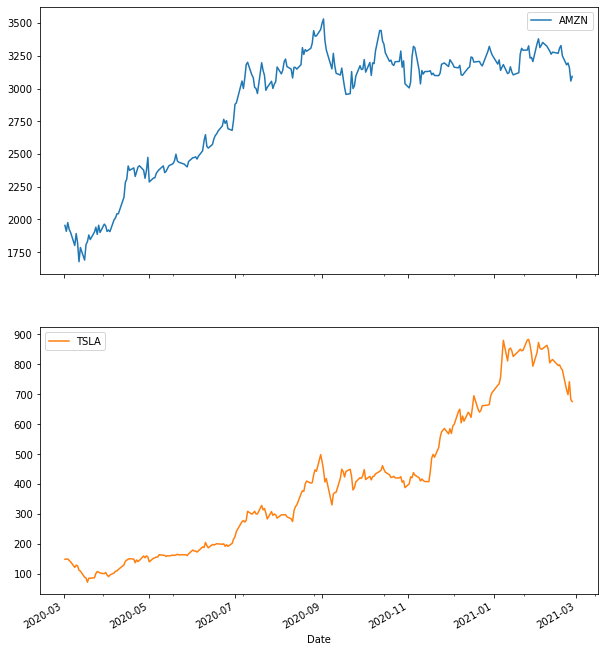

In [6]:
ADJ.plot(figsize=(10, 12), subplots=True)

## Question 3

In [7]:
ADJ.describe().round(2)

,AMZN,TSLA
count,251.00,251.00
mean,2877.47,394.25
std,475.36,235.65
min,1676.61,72.24
25%,2471.72,169.94
50%,3111.89,387.79
75%,3205.60,561.49
max,3531.45,883.09


In [8]:
rets = np.log(ADJ / ADJ.shift(1))
rets.head().round(4)

,AMZN,TSLA
Date,,
2020-03-02,NaN,NaN
2020-03-03,-0.0233,0.0025
2020-03-04,0.0344,0.0053
2020-03-05,-0.0266,-0.0339
2020-03-06,-0.0120,-0.0295


## Question 4

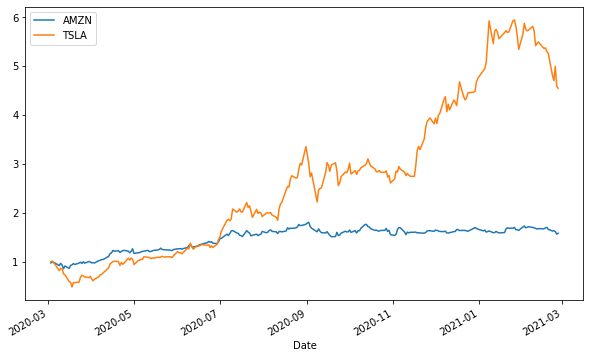

In [9]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

## Question 5

In [10]:
sym = 'AMZN'
AMZN_data = pd.DataFrame(ADJ[sym]).dropna()
AMZN_data.tail()

,AMZN
Date,
2021-02-22,3180.739990
2021-02-23,3194.500000
2021-02-24,3159.530029
2021-02-25,3057.159912
2021-02-26,3092.929932


In [11]:
AMZN_data['SMA1'] = ADJ[sym].rolling(window=20).mean()
AMZN_data['SMA2'] = ADJ[sym].rolling(window=60).mean()
AMZN_data[[sym, 'SMA1', 'SMA2']].tail()

,AMZN,SMA1,SMA2
Date,,,
2021-02-22,3180.739990,3290.295471,3222.121818
2021-02-23,3194.500000,3285.320471,3223.395817
2021-02-24,3159.530029,3276.990479,3222.970150
2021-02-25,3057.159912,3268.219470,3220.667147
2021-02-26,3092.929932,3260.984961,3219.415312


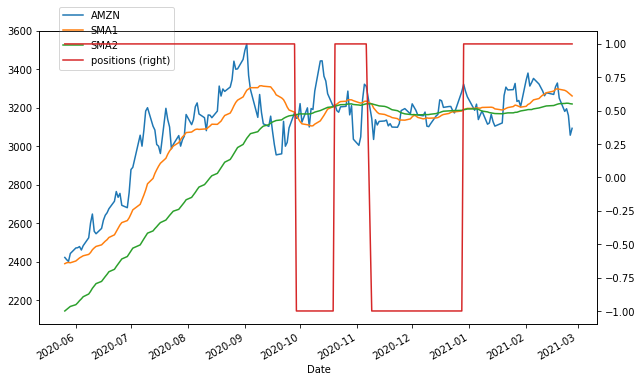

In [12]:
AMZN_data.dropna(inplace=True)
AMZN_data['positions'] = np.where(AMZN_data['SMA1'] > AMZN_data['SMA2'],1,-1)
ax = AMZN_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

## Question 6

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

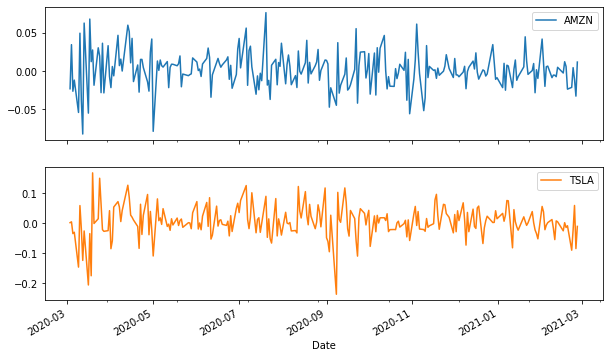

In [13]:
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 6))

array([[<AxesSubplot:xlabel='AMZN', ylabel='AMZN'>,
        <AxesSubplot:xlabel='TSLA', ylabel='AMZN'>],
       [<AxesSubplot:xlabel='AMZN', ylabel='TSLA'>,
        <AxesSubplot:xlabel='TSLA', ylabel='TSLA'>]], dtype=object)

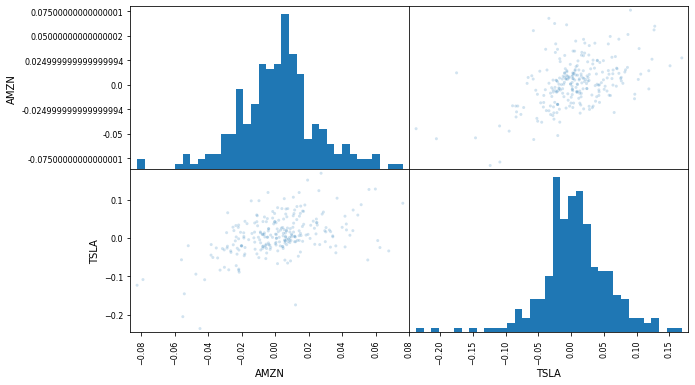

In [14]:
pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

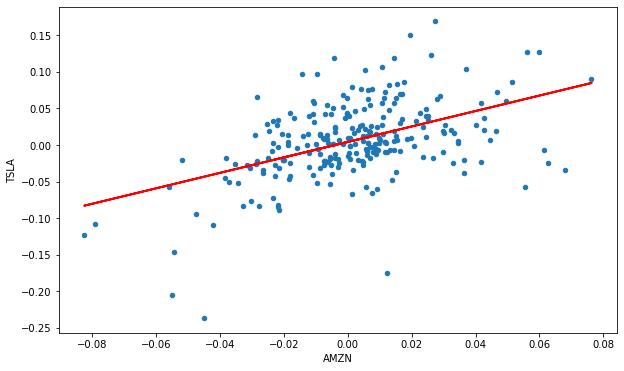

In [15]:
reg = np.polyfit(rets['AMZN'], rets['TSLA'], deg=1)
ax = rets.plot(kind='scatter', x='AMZN', y='TSLA', figsize=(10, 6))
ax.plot(rets['AMZN'], np.polyval(reg, rets['AMZN']), 'r', lw=2);

In [16]:
rets.corr()

,AMZN,TSLA
AMZN,1.000000,0.477949
TSLA,0.477949,1.000000


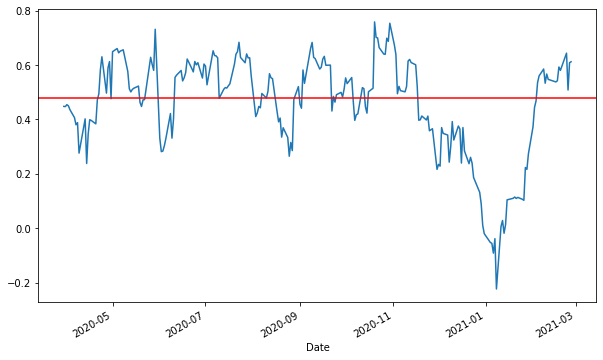

In [17]:
ax = rets['AMZN'].rolling(window=20).corr(rets['TSLA']).plot(figsize=(10, 6)) 
ax.axhline(rets.corr().iloc[0, 1], c='r');